## Deep Learning Toolkits

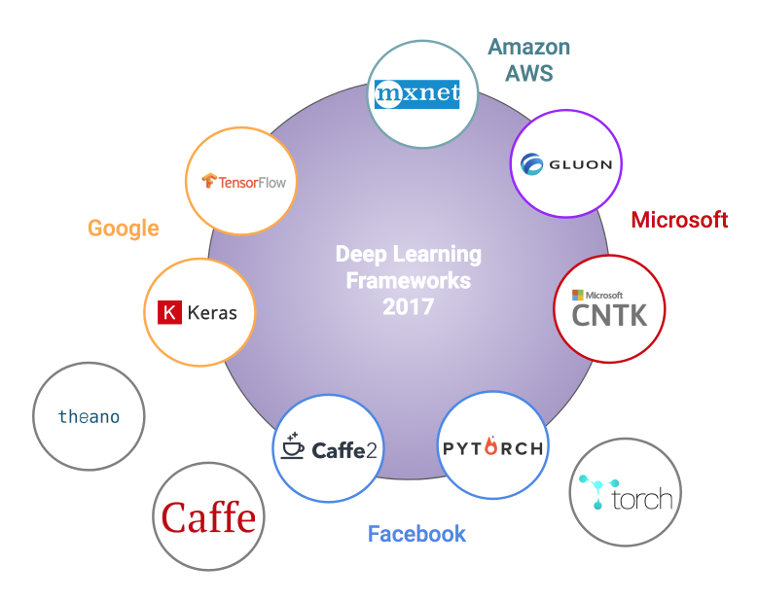

## Why Tensorflow?

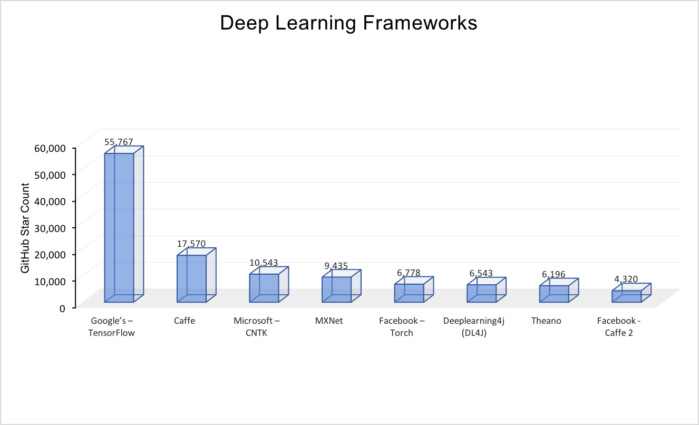

## Data Flow Graph

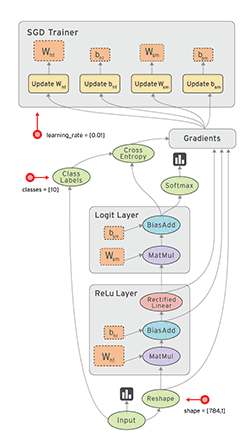

## Tensor

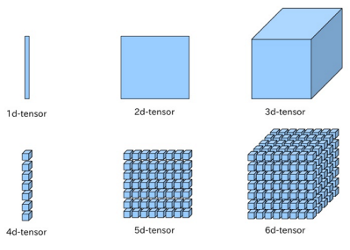

## Execution 
<ul>
<li>Phase 1: assemble a data flow graph.</li> 
<li>Phase 2: Use a <a href='https://www.tensorflow.org/api_docs/python/tf/Session'>session</a> to execute operations in the graph.</li>
</ul>

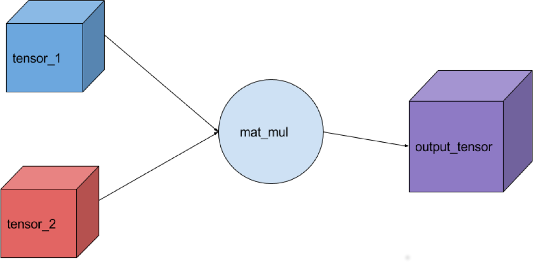

In [96]:
# Import tensorflow
import tensorflow as tf
# Import numpy
import numpy as np
import os

In [97]:
tf.reset_default_graph()

# Compute W * x
with tf.name_scope('constants'):
    constW = tf.constant([-1.0,2.0, 2.0, -1.0], shape = [2,2], dtype=tf.float32, name='const_W')
    print('W = %s' % constW)
    x1 = tf.constant([0,1.0], shape = [2,1], dtype=tf.float32, name = 'const_x1')
    a = tf.matmul(constW, x1, name = 'multiply') # W * x
    print('w*x = %s' % a)

W = Tensor("constants/const_W:0", shape=(2, 2), dtype=float32)
w*x = Tensor("constants/multiply:0", shape=(2, 1), dtype=float32)


In [98]:
with tf.Session() as sess:
    summary_writer = tf.summary.FileWriter(os.path.join('summaries','mul'), sess.graph)
    print('W = %s' % sess.run(constW))
    print('w*x = %s' % sess.run(a))
    summary_writer.close()

W = [[-1.  2.]
 [ 2. -1.]]
w*x = [[ 2.]
 [-1.]]


## Operations
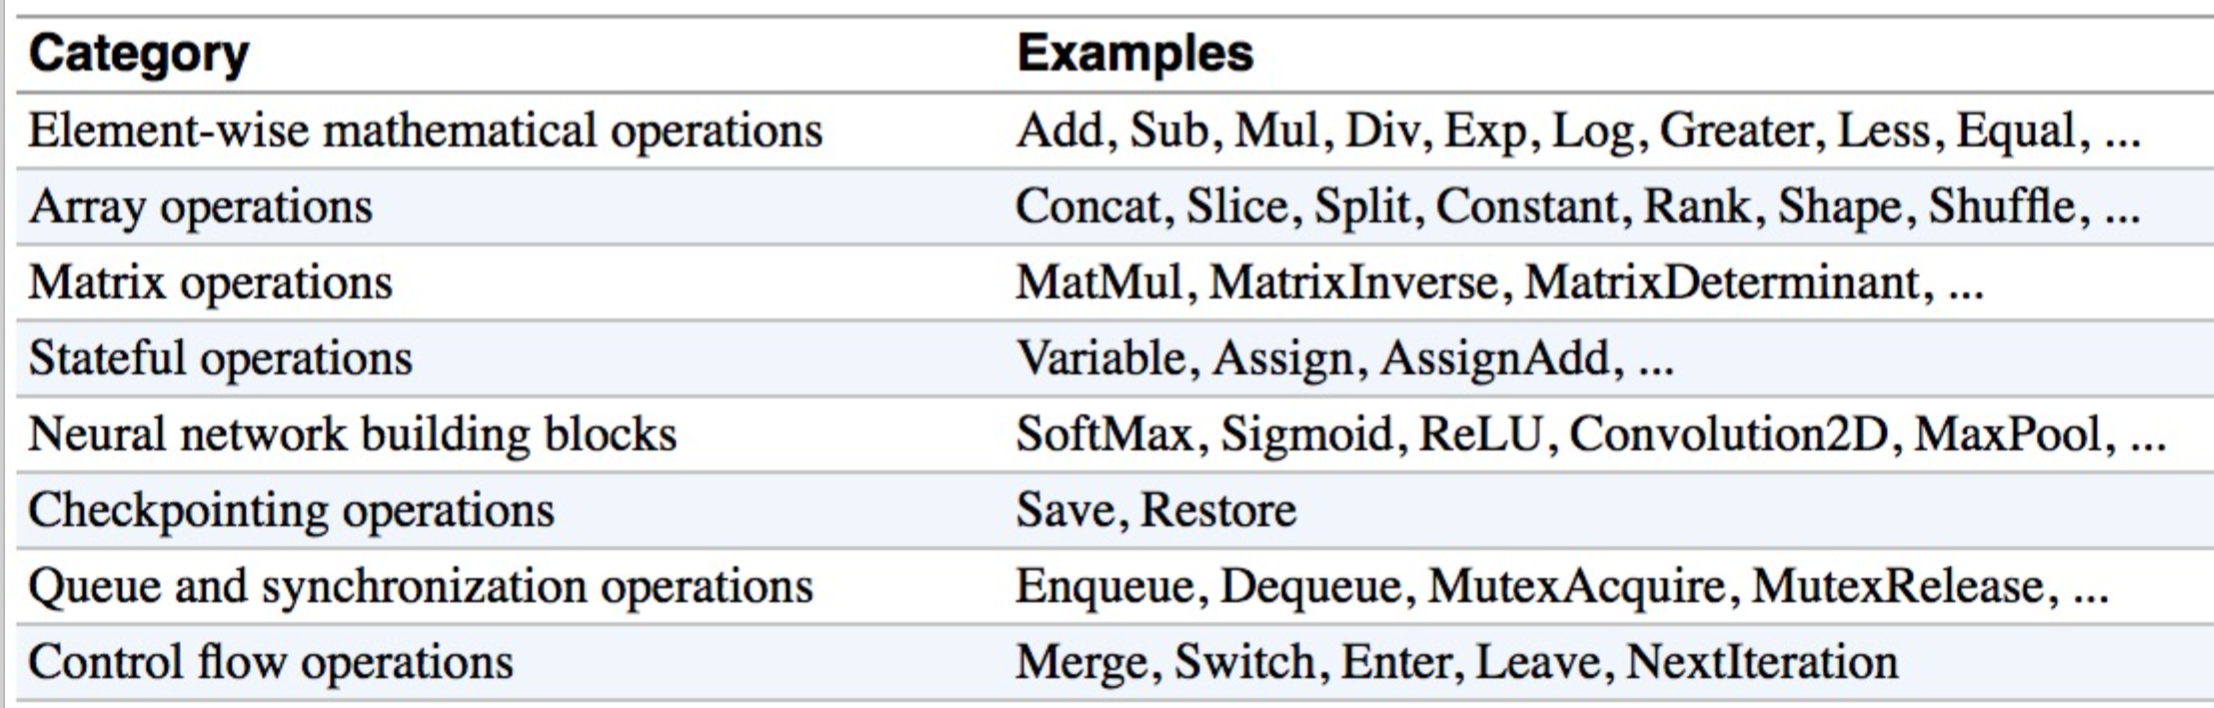

In [99]:
# broadcasting
with tf.name_scope('constants'):
    M = tf.constant([[-2.0,4.0], [12.0, -6.0]], dtype=tf.float32, name='M')
    K = tf.constant([[-1.0,2.0], [-1.0, 2.0]], dtype=tf.float32, name='K')
    z = tf.constant([-1.0,2.0], dtype=tf.float32, name='z')
    mulMat = tf.multiply(M, K)
    MatMulVec = tf.multiply(M, z)
    MatDivVec = tf.div(M, z)
    MatDivVecReshape = tf.multiply(M, tf.reshape(z, shape=[2,1]))

with tf.Session() as sess:
    print('M * K')
    print(sess.run(mulMat))
    print('M * z')
    print(sess.run(MatMulVec))
    print('M / z')
    print(sess.run(MatDivVec))
    print('M / transpose(z)')
    print(sess.run(MatDivVecReshape))

M * K
[[  2.   8.]
 [-12. -12.]]
M * z
[[  2.   8.]
 [-12. -12.]]
M / z
[[  2.   2.]
 [-12.  -3.]]
M / transpose(z)
[[  2.  -4.]
 [ 24. -12.]]


## Feed new data with <a href='https://www.tensorflow.org/api_docs/python/tf/placeholder'>placeholder</a>

In [100]:
constW = tf.constant([-1.0,2.0, 2.0, -1.0], shape = [2,2], dtype=tf.float32, name='const_W')
# Create a place holder of type float 32-bit.
x = tf.placeholder(tf.float32, shape = [2, 1], name = 'x')
w_times_x = tf.matmul(constW, x, name = 'w_times_x')
with tf.Session() as sess:
    print('w * x = %s \n' % sess.run(w_times_x, {x: [[0],[1]]}))
    print('w * x = %s \n' % sess.run(w_times_x, {x: [[1],[0]]}))

w * x = [[ 2.]
 [-1.]] 

w * x = [[-1.]
 [ 2.]] 



## Update W by using <a href='https://www.tensorflow.org/api_docs/python/tf/Variable'>variables</a>


In [101]:
tf.reset_default_graph()
with tf.name_scope('variables'):
    x = tf.placeholder(tf.float32, shape = [2, 1], name = 'x')
    constW = tf.constant([-1.0,2.0, 2.0, -1.0], shape = [2,2], dtype=tf.float32)
    W = tf.Variable(constW, name = 'var_W')
    varW_times_x = tf.matmul(W, x, name = 'varW_times_x')
    loss = tf.reduce_mean(-varW_times_x, name='loss')
    init = tf.global_variables_initializer()
    
with tf.Session() as sess:
    sess.run(init)
    print('w * x = %s \n' % sess.run(varW_times_x, {x: [[0],[1]]}))
    print('sum(w * x) = %s \n' % sess.run(loss, {x: [[0],[1]]}))

w * x = [[ 2.]
 [-1.]] 

sum(w * x) = -0.5 



### Add optimzer

In [102]:
with tf.name_scope('variables'):
    learning_rate = 0.1
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
with tf.Session() as sess:
    sess.run(init)
    log_writer = tf.summary.FileWriter(os.path.join('summaries','sum_loss'), sess.graph)
    op_step, cost =sess.run([train_step, loss], feed_dict={x: [[0],[1]]})
    print('iter 1: ')
    print('cost = %s ' % cost)
    print('W = %s' % W.eval())
    op_step, cost=sess.run([train_step, loss], feed_dict={x: [[0],[10]]})
    print('iter 2: ')
    print('cost = %s ' % cost)
    print('W = %s' % W.eval())
    log_writer.close()

iter 1: 
cost = -0.5 
W = [[-1.    2.05]
 [ 2.   -0.95]]
iter 2: 
cost = -10.5 
W = [[-1.    2.55]
 [ 2.   -0.45]]


### Compute gradient

In [103]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(tf.gradients(loss, W), feed_dict={x: [[0],[1]]}))

[array([[ 0. , -0.5],
       [ 0. , -0.5]], dtype=float32)]
